In [1]:
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = df['SUBCLASS']

data = df.drop(columns=['ID', 'SUBCLASS'])
df_test.drop(columns=['ID'], inplace=True)
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [2]:
disease_list = df.SUBCLASS.unique()
disease_list

array(['KIPAN', 'SARC', 'SKCM', 'KIRC', 'GBMLGG', 'STES', 'BRCA', 'THCA',
       'LIHC', 'HNSC', 'PAAD', 'OV', 'PRAD', 'UCEC', 'LAML', 'COAD',
       'ACC', 'LGG', 'LUSC', 'LUAD', 'CESC', 'PCPG', 'THYM', 'BLCA',
       'TGCT', 'DLBC'], dtype=object)

In [3]:
df[df.SUBCLASS=='ACC']

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
30,TRAIN_0030,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
44,TRAIN_0044,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
50,TRAIN_0050,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
183,TRAIN_0183,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
656,TRAIN_0656,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,TRAIN_5901,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
5917,TRAIN_5917,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6035,TRAIN_6035,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6082,TRAIN_6082,ACC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [4]:
def seek1():
    count_df = df[df.SUBCLASS=='ACC'].apply(lambda x : x!='WT').agg(sum).reset_index(name='count')
    gene_list = count_df[count_df['count']>0]['index'].values
    print(len(gene_list))

In [5]:
df[df.SUBCLASS=='SKCM'].apply(lambda x : x!='WT').columns


Index(['ID', 'SUBCLASS', 'A2M', 'AAAS', 'AADAT', 'AARS1', 'ABAT', 'ABCA1',
       'ABCA2', 'ABCA3',
       ...
       'ZNF292', 'ZNF365', 'ZNF639', 'ZNF707', 'ZNFX1', 'ZNRF4', 'ZPBP',
       'ZW10', 'ZWINT', 'ZYX'],
      dtype='object', length=4386)

In [6]:
def get_gene_list2():
    genes = []
    gene_set = set()
    for disease in df["SUBCLASS"].unique():
        disease_df = df[df["SUBCLASS"] == disease]

        non_wt_counts = (disease_df != 'WT').sum()  # "WT"가 아닌 행 개수
        non_wt_counts_sorted = non_wt_counts.sort_values(ascending=False) #빈도 수가 높은 순서대로 정렬

        n = 20 # 추출한 상위 유전자 개수
        genes.extend(list(non_wt_counts_sorted[2:2+n].index))

        #print(f'{disease} - 전체 행의 개수 : {len(disease_df)}')
        dd = non_wt_counts_sorted[2:n].reset_index()
        gene_list1 = dd['index'].values
        gene_set.update(gene_list1)
        #print(gene_list1)
    return gene_set

In [7]:
def get_gene_list1():
    selected_genes = set()
    for d in disease_list:
        count_df = df[df.SUBCLASS==d].apply(lambda x : x!='WT').agg(sum)
        count_df = count_df[2:].reset_index(name='count')        
        gene_list = count_df[count_df['count']>6]['index'].values
        print(d, len(gene_list))
        selected_genes.update(gene_list)
    print(len(selected_genes))
    return selected_genes
glist = get_gene_list1()

KIPAN 194
SARC 22
SKCM 1844
KIRC 38
GBMLGG 107
STES 1686
BRCA 487
THCA 3
LIHC 65
HNSC 236
PAAD 15
OV 29
PRAD 11
UCEC 1633
LAML 7
COAD 715
ACC 38
LGG 12
LUSC 434
LUAD 358
CESC 121
PCPG 3
THYM 1
BLCA 132
TGCT 8
DLBC 11
2576


In [ ]:
from collections import defaultdict
def get_gene_dictionary():
    main_genes = defaultdict()
    for d in disease_list:
        count_df = df[df.SUBCLASS==d].apply(lambda x : x!='WT').agg(sum)
        count_df = count_df[2:].reset_index(name='count')        
        gene_list = count_df[count_df['count']>6]['index'].values
        main_genes[d]= gene_list
    return main_genes
main_genes = get_gene_dictionary()


In [11]:
for k, v in main_genes.items():
    print(k, len(v))

KIPAN 194
SARC 22
SKCM 1844
KIRC 38
GBMLGG 107
STES 1686
BRCA 487
THCA 3
LIHC 65
HNSC 236
PAAD 15
OV 29
PRAD 11
UCEC 1633
LAML 7
COAD 715
ACC 38
LGG 12
LUSC 434
LUAD 358
CESC 121
PCPG 3
THYM 1
BLCA 132
TGCT 8
DLBC 11


In [13]:
main_genes.get('KIPAN')

array(['ABCA1', 'ABCA4', 'ABCC3', 'ABL1', 'ACE', 'ADAR', 'ADCY9', 'AGL',
       'AGRN', 'AHNAK', 'AKAP12', 'ALMS1', 'AOX1', 'APC', 'AQP7',
       'ARFGEF2', 'ARHGAP5', 'ARID4A', 'ATP1A1', 'ATP2A1', 'ATRX',
       'ATXN2', 'BCAN', 'BRCA2', 'C3', 'CACNA1A', 'CACNA1H', 'CAD',
       'CDC27', 'CDH8', 'CELSR1', 'CELSR2', 'CENPE', 'CENPF', 'CERCAM',
       'CFTR', 'CLCN2', 'CLIP1', 'CLTC', 'COL15A1', 'COL6A3', 'CR1',
       'CREBBP', 'CROCC', 'CUL3', 'DAB2', 'DCC', 'DMD', 'DNMT1', 'DOCK10',
       'DOCK2', 'DOCK4', 'DST', 'DYNC1H1', 'EPB41L3', 'ESPL1', 'F12',
       'F5', 'FASN', 'FBN1', 'FBN2', 'FLNA', 'FLNC', 'FLT4', 'FN1',
       'GBF1', 'GREB1', 'GRID2', 'HDAC6', 'HELZ2', 'HLA-A', 'HLA-B',
       'HLA-C', 'HLA-DRB1', 'HRC', 'HSP90AB1', 'HSPA8', 'HUWE1', 'IGF2R',
       'IGSF3', 'IL6ST', 'INCENP', 'IQGAP2', 'ITGAM', 'ITGB4', 'ITPR2',
       'JAK2', 'KALRN', 'KAT2B', 'KDM6B', 'KIF1B', 'KMT2D', 'KRT4',
       'LAMA1', 'LAMA2', 'LAMA3', 'LAMB3', 'LCT', 'LIPE', 'LPIN1', 'LRP1',
       'LRPPRC

In [14]:
total = pd.concat([data, df_test])
#total = total.loc[:, list(glist)]
total = total.loc[:, main_genes.get('KIPAN')]
total

,ABCA1,ABCA4,ABCC3,ABL1,ACE,ADAR,ADCY9,AGL,AGRN,AHNAK,...,TP53,TRIO,TRO,TSC2,TUBGCP6,VCAN,VHL,VWF,WWP1,ZNFX1
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,M237I,WT,WT,K1585M,WT,WT,WT,WT,WT,WT
2,WT,WT,WT,I489I,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,R698K,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,E1479V,...,M246R,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,WT,WT,WT,WT,WT,WT,WT,WT,WT,K884K,...,R114S R234S R141S R273S,WT,WT,WT,WT,WT,WT,WT,WT,WT
2542,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,R248W,WT,WT,WT,WT,WT,WT,WT,WT,WT
2543,L217I,G606D,A403A,S1106N S1125N,L696P L1270P L1081P L655P L986P L475P,WT,WT,R1121K R1105K,R1246Q,G2016C,...,WT,V1917M,G1300S G903S G831S,D1691E D1631E D1678E D1668E D1711E D1490E D168...,T1301M,T1553T T566T T3307T T2320T,WT,C898C,V72G,L305L
2544,WT,R1517H,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [18]:
ccdf = total.copy()
for c in ccdf.columns:
    ccdf[c] = ccdf[c].apply(lambda x : 0 if x =='WT' else len(str(x).split(' ')))
ccdf


,ABCA1,ABCA4,ABCC3,ABL1,ACE,ADAR,ADCY9,AGL,AGRN,AHNAK,...,TP53,TRIO,TRO,TSC2,TUBGCP6,VCAN,VHL,VWF,WWP1,ZNFX1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,1,...,4,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2543,1,1,1,2,6,0,0,2,1,1,...,0,1,3,11,1,4,0,1,1,1
2544,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ccdf.corr()

,ABCA1,ABCA4,ABCC3,ABL1,ACE,ADAR,ADCY9,AGL,AGRN,AHNAK,...,TP53,TRIO,TRO,TSC2,TUBGCP6,VCAN,VHL,VWF,WWP1,ZNFX1
ABCA1,1.000000,0.306810,0.211538,0.225938,0.208339,0.210263,0.301271,0.298447,0.218490,0.353074,...,0.053592,0.323630,0.256348,0.153073,0.239479,0.411890,0.004739,0.309218,0.258717,0.303444
ABCA4,0.306810,1.000000,0.612657,0.275946,0.413745,0.196051,0.215207,0.274266,0.247571,0.407751,...,0.064327,0.523503,0.318844,0.157951,0.357421,0.582219,0.007549,0.617522,0.296622,0.375427
ABCC3,0.211538,0.612657,1.000000,0.275995,0.418151,0.167187,0.200698,0.243444,0.230760,0.325190,...,0.040666,0.459976,0.270010,0.156606,0.334227,0.509470,-0.001175,0.590558,0.261597,0.294917
ABL1,0.225938,0.275946,0.275995,1.000000,0.280598,0.250384,0.220165,0.284564,0.229859,0.232860,...,0.069673,0.291748,0.298985,0.251475,0.232566,0.322632,0.034138,0.277561,0.236823,0.228379
ACE,0.208339,0.413745,0.418151,0.280598,1.000000,0.240670,0.177322,0.330939,0.277809,0.246108,...,0.076490,0.364602,0.293658,0.207783,0.293884,0.397280,0.050059,0.395464,0.197858,0.272975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VCAN,0.411890,0.582219,0.509470,0.322632,0.397280,0.308376,0.314014,0.383967,0.282327,0.439731,...,0.106590,0.543501,0.399404,0.208390,0.394026,1.000000,0.001593,0.561915,0.362543,0.441830
VHL,0.004739,0.007549,-0.001175,0.034138,0.050059,0.025984,0.032687,0.026059,0.020842,-0.025174,...,-0.081389,0.002106,0.018939,0.027676,-0.005026,0.001593,1.000000,0.015411,0.024871,0.019395
VWF,0.309218,0.617522,0.590558,0.277561,0.395464,0.198709,0.196208,0.277519,0.235676,0.367783,...,0.069898,0.501255,0.285019,0.122003,0.351557,0.561915,0.015411,1.000000,0.292647,0.342594
WWP1,0.258717,0.296622,0.261597,0.236823,0.197858,0.211448,0.326038,0.288459,0.180668,0.264790,...,0.036015,0.287818,0.232938,0.181074,0.198257,0.362543,0.024871,0.292647,1.000000,0.317211


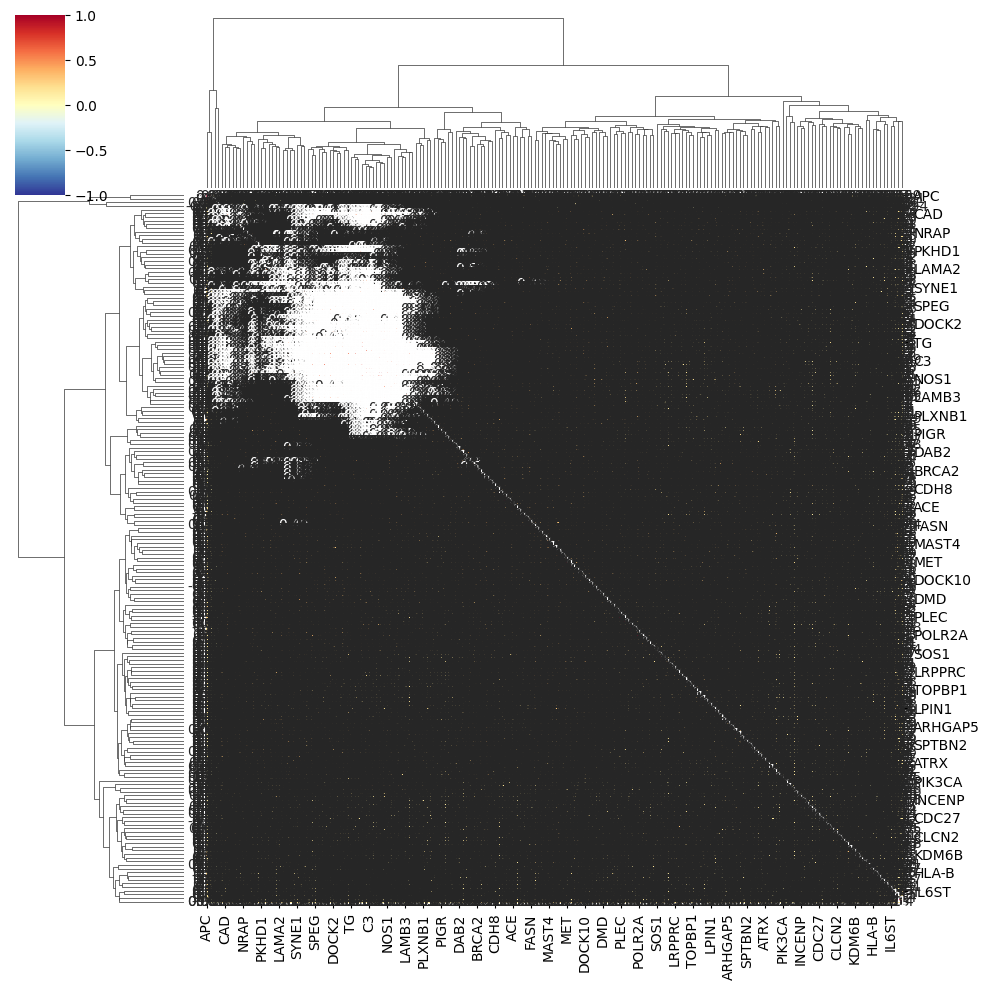

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.clustermap(ccdf.corr(), 
            annot = True,      # 실제 값 화면에 나타내기
            cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
            vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
            )

In [9]:
diseaseList = df.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,786
1,KIPAN,515
2,GBMLGG,461
3,STES,379
4,KIRC,334
5,THCA,324
6,SKCM,276
7,PRAD,266
8,OV,253
9,LGG,229


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in total.columns:
    total[c] = encoder.fit_transform(total[c])



In [11]:
df = total[:6201]
df_test = total[6201:]



In [12]:
df

,ABCB8,AMPH,CAT,RXRG,PIDD1,ISL1,ALS2,STARD4,PDK3,TEX15,...,ITGA5,CUL4A,NLGN3,RRAD,AIFM1,MYH11,HSD17B2,ITGB3,PKHD1,TXNIP
0,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,27,52,123,516,60
1,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
2,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
3,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
4,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,31,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
6197,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
6198,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
6199,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60


In [13]:
df_test

,ABCB8,AMPH,CAT,RXRG,PIDD1,ISL1,ALS2,STARD4,PDK3,TEX15,...,ITGA5,CUL4A,NLGN3,RRAD,AIFM1,MYH11,HSD17B2,ITGB3,PKHD1,TXNIP
0,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
1,93,169,61,93,72,82,85,41,51,320,...,126,93,113,55,69,319,52,123,516,60
2,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
3,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
4,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,490,60
2542,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,56,52,123,516,60
2543,60,157,3,93,72,82,133,41,50,270,...,126,7,113,55,69,187,52,123,43,60
2544,93,169,59,93,72,82,163,41,51,320,...,126,93,113,55,69,319,52,123,516,60


In [14]:
from sklearn.preprocessing import LabelEncoder
X = df
y = df_target
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)
y


array([ 8, 19, 20, ...,  4, 22, 20])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)
print(X_train.shape, X_test.shape)

(4340, 2576) (1861, 2576)


In [16]:
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)


#Multi-class classification

In [52]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': 26
}
num_boost_round = 10

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round, #early_stopping_rounds=5, 
                  evals=[(dtrain, 'train'), (dtest, 'valid')],
                  verbose_eval=2)

[0]	train-mlogloss:2.62815	valid-mlogloss:2.71554
[2]	train-mlogloss:2.23955	valid-mlogloss:2.46264
[4]	train-mlogloss:2.01032	valid-mlogloss:2.33915
[6]	train-mlogloss:1.85121	valid-mlogloss:2.26501
[8]	train-mlogloss:1.73240	valid-mlogloss:2.21929
[10]	train-mlogloss:1.64007	valid-mlogloss:2.18845
[12]	train-mlogloss:1.56804	valid-mlogloss:2.16630
[14]	train-mlogloss:1.50729	valid-mlogloss:2.14952
[16]	train-mlogloss:1.45357	valid-mlogloss:2.13840
[18]	train-mlogloss:1.40684	valid-mlogloss:2.13066
[20]	train-mlogloss:1.36576	valid-mlogloss:2.12458
[22]	train-mlogloss:1.32932	valid-mlogloss:2.12065
[24]	train-mlogloss:1.29695	valid-mlogloss:2.12028
[26]	train-mlogloss:1.26616	valid-mlogloss:2.12199
[28]	train-mlogloss:1.23775	valid-mlogloss:2.11884
[30]	train-mlogloss:1.21123	valid-mlogloss:2.11912
[32]	train-mlogloss:1.18626	valid-mlogloss:2.12038
[34]	train-mlogloss:1.16356	valid-mlogloss:2.12054
[36]	train-mlogloss:1.14114	valid-mlogloss:2.12140
[38]	train-mlogloss:1.11951	valid-ml

In [68]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    #'learning_rate': 0.05
}
num_boost_round = 10

clf = xgb.XGBClassifier(n_estimators=num_boost_round,early_stopping_rounds=5, **params)
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:2.62815	validation_1-mlogloss:2.71554
[2]	validation_0-mlogloss:2.23955	validation_1-mlogloss:2.46264
[4]	validation_0-mlogloss:2.01032	validation_1-mlogloss:2.33915
[6]	validation_0-mlogloss:1.85121	validation_1-mlogloss:2.26501
[8]	validation_0-mlogloss:1.73240	validation_1-mlogloss:2.21929
[10]	validation_0-mlogloss:1.64007	validation_1-mlogloss:2.18845
[12]	validation_0-mlogloss:1.56804	validation_1-mlogloss:2.16630
[14]	validation_0-mlogloss:1.50729	validation_1-mlogloss:2.14952
[16]	validation_0-mlogloss:1.45357	validation_1-mlogloss:2.13840
[18]	validation_0-mlogloss:1.40684	validation_1-mlogloss:2.13066
[20]	validation_0-mlogloss:1.36576	validation_1-mlogloss:2.12458
[22]	validation_0-mlogloss:1.32932	validation_1-mlogloss:2.12065
[24]	validation_0-mlogloss:1.29695	validation_1-mlogloss:2.12028
[26]	validation_0-mlogloss:1.26616	validation_1-mlogloss:2.12199
[28]	validation_0-mlogloss:1.23775	validation_1-mlogloss:2.11884
[30]	validation_0-mlogloss:1.2

In [56]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1861,), (1861,), (1861, 26))

In [57]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3476625470177324

In [58]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3476625470177324

In [59]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       0.45      0.14      0.22        35
           2       0.28      0.66      0.40       238
           3       0.19      0.08      0.11        39
           4       0.61      0.62      0.61        63
           5       1.00      0.06      0.12        16
           6       0.33      0.27      0.30       150
           7       0.30      0.27      0.28        60
           8       0.24      0.33      0.28       159
           9       0.07      0.04      0.05       104
          10       0.83      0.31      0.45        48
          11       0.24      0.37      0.29        57
          12       0.26      0.17      0.20        48
          13       0.28      0.12      0.17        59
          14       0.33      0.10      0.16        49
          15       0.27      0.44      0.34        93
          16       0.27      0.11      0.15        28
          17       0.21    

In [67]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8583267012357305

In [61]:
clf.predict(df_test)

array([21, 25,  2, ..., 25, 10,  6])

In [62]:
res = clf.predict(df_test)



In [ ]:
clf.predict_proba(df_test)#[:,1]

In [63]:
res = encoder2.inverse_transform(res)

In [64]:

df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


,ID,SUBCLASS
0,TEST_0000,STES
1,TEST_0001,UCEC
2,TEST_0002,BRCA
3,TEST_0003,LGG
4,TEST_0004,HNSC
...,...,...
2541,TEST_2541,BLCA
2542,TEST_2542,PAAD
2543,TEST_2543,UCEC
2544,TEST_2544,LAML


In [66]:
res_df.to_csv('res07-2578-6-2.csv',index = False)

In [ ]:
pred_probs = xgb_model.predict(dtest)


In [ ]:
import numpy as np
print(np.round(pred_probs[:10], 3))


In [58]:
preds= [round(x) if x > 0 else 0 for x in pred_probs]

In [ ]:
preds

In [60]:
for p in preds:
    if p<0:
        print(p)


In [ ]:
encoder.inverse_transform(preds)

In [35]:
model = RandomForestClassifier(
            n_estimators=50, ## 붓스트랩 샘플 개수 또는 base_estimator 개수
            criterion='entropy', ## 불순도 측도
            max_depth=65, ## 개별 나무의 최대 깊이
            #max_features='sqrt', ## 매 분리시 랜덤으로 뽑을 변수 개수
            #max_samples=1.0, ## 붓스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다.
            #bootstrap=True, ## 복원 추출,  False이면 비복원 추출
            oob_score=True, ## Out-of-bag 데이터를 이용한 성능 계산
            random_state=100
).fit(X,y)


In [ ]:
## 예측
print(model.predict(X)[:3]) 
print()


In [ ]:
X[:3]

In [ ]:
## 성능 평가
print(model.oob_score_) ## Out-of-bag 성능 평가 점수
print('정확도 : ', model.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()
## 변수 중요도
print(model.feature_importances_)




In [ ]:
## 성능 평가
print(model.oob_score_) ## Out-of-bag 성능 평가 점수
print('정확도 : ', model.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()
## 변수 중요도
print(model.feature_importances_)




In [ ]:
res = model.predict(df_test)
res

In [ ]:
res = model.predict(df_test)
res

In [ ]:
df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df



In [24]:
res_df.to_csv('res04.csv',index = False)

In [ ]:
df[df.SUBCLASS == 'BRCA'].sum().sort_values(ascending=False).str.replace('WT','')

In [ ]:
df[df['SUBCLASS']=='DLBC']

In [ ]:
import numpy as np 
dfs = df[df['SUBCLASS']=='DLBC']
dfs.columns

In [ ]:
for c in dfs.columns:
    dfs[c] = np.where(dfs[c] == 'WT', 0, 1)
dfs

    

In [ ]:
dfs = df[df['SUBCLASS']=='DLBC']
dfs.apply(lambda x: x(if x=='WT' else x=1))

In [ ]:
for  x in df.iloc[0]:
    if x != 'WT': print(x)


In [ ]:
len(df_test.columns)

In [ ]:
len(df_test)

In [ ]:
df.colu